# Objective

**Day 8 of the [#30DayChartChallenge challenge](https://github.com/Z3tt/30DayChartChallenge_Collection2021/blob/main/README.md)**

**Topic: 8. animals**

Used Dataset: https://pixabay.com/de/photos/pinguin-aquatischen-schwimmen-2203693/, 
https://pixabay.com/de/photos/pinguine-kaiserpinguine-baby-mutter-429134/

# Setup

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image
import cv2

# Read Data

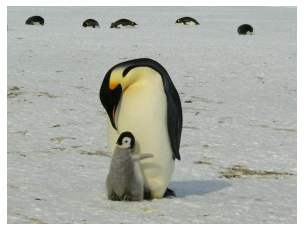

In [57]:
img=mpimg.imread("../images/penguin-2203693_640.jpg")
img=mpimg.imread("../images/penguins-429134_640.jpg")
plt.imshow(img)
plt.axis('off');

# Some example Plots changing the Colors

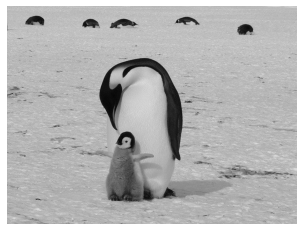

In [77]:
img_grey = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(img_grey, cmap=plt.get_cmap('gray'))
plt.axis('off');

(480, 640)


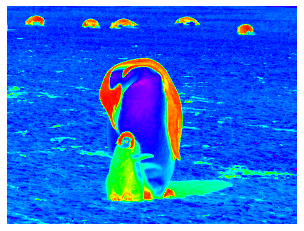

In [59]:
lum_img = img[:,:,0]
print(lum_img.shape)
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('gist_rainbow')
plt.axis('off');

In [60]:
img.shape

(480, 640, 3)

# PCA from colored Image

In [61]:
blue,green,red = cv2.split(img)

In [62]:
#initialize PCA with first 20 principal components
pca = PCA(20)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

In [63]:
img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

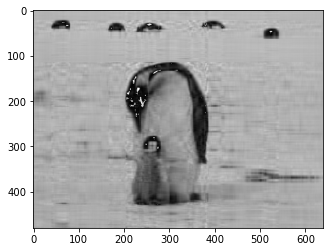

In [64]:
plt.imshow(img_compressed);

# PCA from greyscale Image

In [99]:
#initialize PCA with first i principal components
inverted = []
for i in range(0,100,5):
    pca = PCA(i)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    transformed = pca.fit_transform(np.array(img_grey))
    inverted.append(pca.inverse_transform(transformed))
print(len(inverted))

20


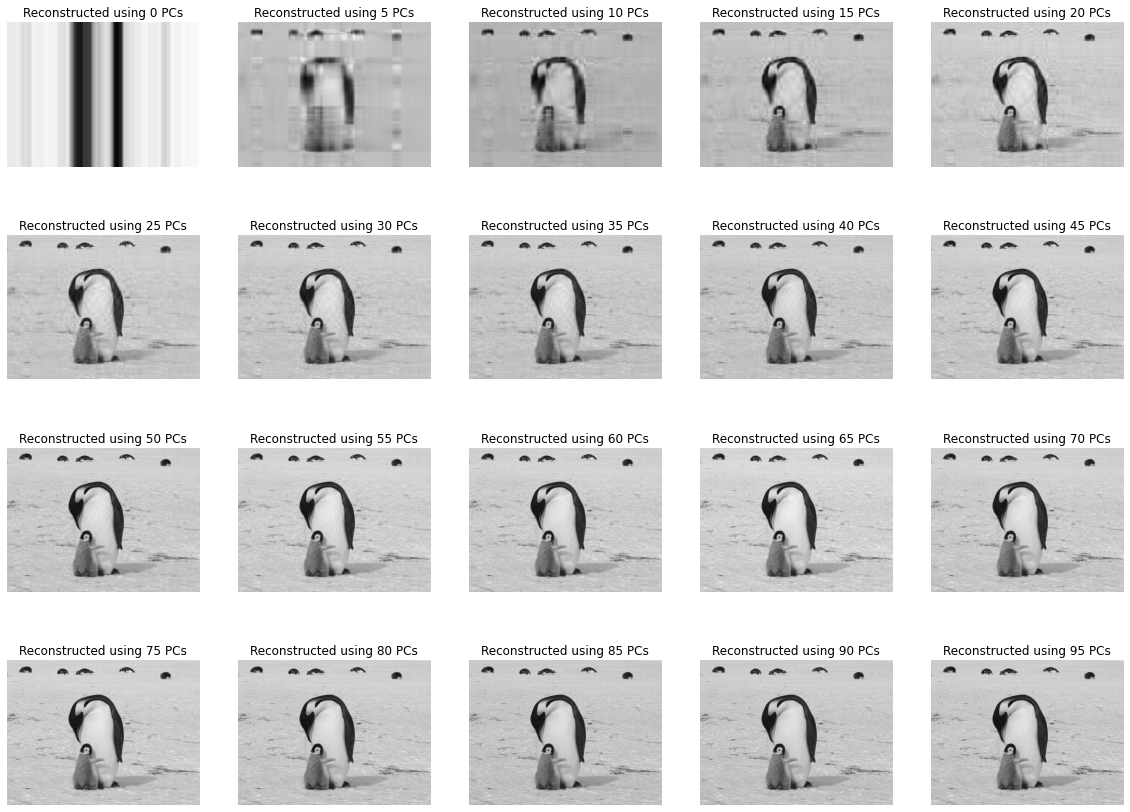

In [98]:
fig, axes = plt.subplots(4, 5, figsize=(20,15))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(inverted[i], cmap=plt.get_cmap('gray'))
    ax.set_title(f'Reconstructed using {i*5} PCs');
    ax.axis('off');
plt.savefig('../plots/day08_animals.png')